# Interacting with Neo4j

## Using py2neo to connect to Neo4j and clear the database

In [36]:
import sys; sys.path.insert(0, '../resources/python/')
from datasci4health.graphdrawer.visgraph import draw
!mkdir -p figure && mkdir -p graphs

from py2neo import Graph
graph = Graph("bolt://127.0.0.1:7687")
graph.delete_all()

print("Number of nodes: {} ".format(len(graph.nodes)))
print("Number of relationships: {} ".format(len(graph.relationships)))

Number of nodes: 0 
Number of relationships: 0 


## Querying via ipython-cypher 

In [37]:
%load_ext cypher

The cypher extension is already loaded. To reload it, use:
  %reload_ext cypher


### Nodes

In [38]:
%%cypher 
CREATE (person1:Person {name:'Asdrubal'}),
       (person2:Person {name:'Marcos'}   )
return person1, person2

2 nodes created.
2 properties set.
2 labels added.


person1,person2
{'name': 'Asdrubal'},{'name': 'Marcos'}


### Relationships

In [39]:
%%cypher
CREATE (person1:Person {name:'Matheus'})-[r1:LIKES]->(movie1:Movie {title:'Inglourious Basterds', year:2009}),
       (person2:Person {name:'Lais'}   )-[r2:LIKES]->(movie1)
return person1, person2, movie1,r1,r2

3 nodes created.
4 properties set.
2 relationships created.
3 labels added.


person1,person2,movie1,r1,r2
{'name': 'Matheus'},{'name': 'Lais'},"{'year': 2009, 'title': 'Inglourious Basterds'}",{},{}


### Querying

In [40]:
%%cypher
MATCH (person:Person)-[:LIKES]->(movie:Movie)
RETURN person.name as person_name, movie

2 rows affected.


person_name,movie
Lais,"{'year': 2009, 'title': 'Inglourious Basterds'}"
Matheus,"{'year': 2009, 'title': 'Inglourious Basterds'}"


In [41]:
%%cypher
MATCH (person:Person)-[:LIKES]->(movie:Movie)
WHERE  person.name = 'Matheus'
RETURN person.name as person_name, movie.title

1 rows affected.


person_name,movie.title
Matheus,Inglourious Basterds


## Visualizing the graph

In [42]:
options = {}
draw(graph, options, physics=True)

In [43]:
options = {"Person": "name", "Movie": "title"}
draw(graph, options, physics=True)

## Programmatical querying via py2neo

Examples adapted from http://nicolewhite.github.io/neo4j-jupyter/

In [44]:
from py2neo import Node, Relationship

### Nodes

In [45]:
nicole = Node("Person", name="Nicole", age=24)
drew   = Node("Person", name="Drew", age=20)

mtdew    = Node("Drink", name="Mountain Dew", calories=9000)
cokezero = Node("Drink", name="Coke Zero", calories=0)

coke     = Node("Manufacturer", name="Coca Cola")
pepsi    = Node("Manufacturer", name="Pepsi")

graph.create(nicole | drew | mtdew | cokezero | coke | pepsi)

In [46]:
options = {"Person": "name", "Drink": "name", "Manufacturer": "name", "Movie": "title"}
draw(graph, options, physics=True)

### Relationships

In [47]:
from py2neo import Relationship

graph.create(Relationship(nicole, "LIKES", cokezero))
graph.create(Relationship(nicole, "LIKES", mtdew))
graph.create(Relationship(drew,   "LIKES", mtdew))
graph.create(Relationship(coke,   "MAKES", cokezero))
graph.create(Relationship(pepsi,  "MAKES", mtdew))

draw(graph, options, physics=True)

### py2neo cypher

In [48]:
query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name AS name, drink.name AS drink
"""

data = graph.run(query)

for d in data:
    print(d)

'Drew'	'Mountain Dew'
'Nicole'	'Mountain Dew'
'Nicole'	'Coke Zero'


## ipython-cypher + pandas

In [49]:
results = %cypher MATCH (person:Person)-[:LIKES]->(drink:Drink) \
                  RETURN person.name AS name, drink.name AS drink
    
df = results.get_dataframe()

df

3 rows affected.


,name,drink
0,Drew,Mountain Dew
1,Nicole,Mountain Dew
2,Nicole,Coke Zero


## ipython-cypher + networkx

3 rows affected.


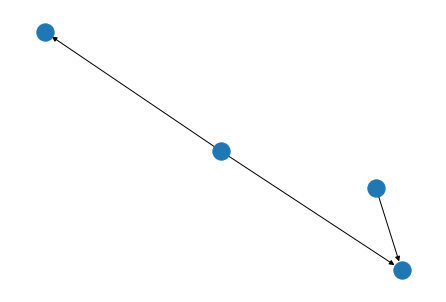

In [50]:
import networkx as nx
%matplotlib inline

results = %cypher MATCH p = (:Person)-[:LIKES]->(:Drink) RETURN p

g = results.get_graph()

nx.draw(g)

In [51]:
g.nodes(data=True)

NodeDataView({'57': {'name': 'Drew', 'age': 20, 'labels': ['Person']}, '60': {'name': 'Mountain Dew', 'calories': 9000, 'labels': ['Drink']}, '56': {'name': 'Nicole', 'age': 24, 'labels': ['Person']}, '61': {'name': 'Coke Zero', 'calories': 0, 'labels': ['Drink']}})

In [52]:
nx.degree(g)

DiMultiDegreeView({'57': 1, '60': 2, '56': 2, '61': 1})

## jgraph
http://patrickfuller.github.io/jgraph/examples/ipython.html